In [ ]:
#%pip install pystan


In [ ]:
import pandas as pd
from prophet import Prophet
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error
import warnings

In [ ]:
warnings.filterwarnings("ignore")
plt.style.use('ggplot')
plt.style.use('fivethirtyeight')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/hashcode11/demand.csv')
df.head()


,Product_Code,Warehouse,Product_Category,Date,Order_Demand
0,Product_0993,Whse_J,Category_028,2012/7/27,100
1,Product_0979,Whse_J,Category_028,2012/1/19,500
2,Product_0979,Whse_J,Category_028,2012/2/3,500
3,Product_0979,Whse_J,Category_028,2012/2/9,500
4,Product_0979,Whse_J,Category_028,2012/3/2,500


In [ ]:
df.dtypes
df.tail()

,Product_Code,Warehouse,Product_Category,Date,Order_Demand
1048570,Product_1791,Whse_J,Category_006,2016/4/27,1000
1048571,Product_1974,Whse_J,Category_006,2016/4/27,1
1048572,Product_1787,Whse_J,Category_006,2016/4/28,2500
1048573,Product_0901,Whse_J,Category_023,2016/10/7,50
1048574,Product_0704,Whse_J,Category_001,2016/6/27,4


In [ ]:
df = df[df['Warehouse'] == 'Whse_J']
df

,Product_Code,Warehouse,Product_Category,Date,Order_Demand
0,Product_0993,Whse_J,Category_028,2012/7/27,100
1,Product_0979,Whse_J,Category_028,2012/1/19,500
2,Product_0979,Whse_J,Category_028,2012/2/3,500
3,Product_0979,Whse_J,Category_028,2012/2/9,500
4,Product_0979,Whse_J,Category_028,2012/3/2,500
...,...,...,...,...,...
1048570,Product_1791,Whse_J,Category_006,2016/4/27,1000
1048571,Product_1974,Whse_J,Category_006,2016/4/27,1
1048572,Product_1787,Whse_J,Category_006,2016/4/28,2500
1048573,Product_0901,Whse_J,Category_023,2016/10/7,50


In [ ]:
df1 = df[df['Product_Category'] == 'Category_019']

#filtering the other product categories


In [ ]:
df1['Product_Code'].unique()



array(['Product_1234', 'Product_1451', 'Product_1274', 'Product_1512',
       'Product_1372', 'Product_1900', 'Product_1248', 'Product_1278',
       'Product_1359', 'Product_1270', 'Product_1486', 'Product_1246',
       'Product_1262', 'Product_1430', 'Product_1469', 'Product_1250',
       'Product_1316', 'Product_1410', 'Product_1315', 'Product_1371',
       'Product_1470', 'Product_1286', 'Product_1489', 'Product_1400',
       'Product_1357', 'Product_1294', 'Product_1377', 'Product_1452',
       'Product_1381', 'Product_1632', 'Product_1312', 'Product_1427',
       'Product_1350', 'Product_1513', 'Product_1996', 'Product_1360',
       'Product_1264', 'Product_1432', 'Product_2043', 'Product_2047',
       'Product_2048', 'Product_2045', 'Product_2042', 'Product_2044',
       'Product_1995', 'Product_1643', 'Product_2046', 'Product_0639',
       'Product_1226', 'Product_1570', 'Product_1648', 'Product_1651',
       'Product_1905', 'Product_1901', 'Product_1903', 'Product_1186',
      

In [ ]:
df11 = df1[df1['Product_Code'] == 'Product_1359']
df11

,Product_Code,Warehouse,Product_Category,Date,Order_Demand
276,Product_1359,Whse_J,Category_019,2012/4/18,80000
282,Product_1359,Whse_J,Category_019,2012/5/21,70000
289,Product_1359,Whse_J,Category_019,2012/6/26,80000
292,Product_1359,Whse_J,Category_019,2012/7/17,100000
296,Product_1359,Whse_J,Category_019,2012/8/24,100000
...,...,...,...,...,...
1046514,Product_1359,Whse_J,Category_019,2016/10/3,20000
1046515,Product_1359,Whse_J,Category_019,2016/9/16,10000
1046516,Product_1359,Whse_J,Category_019,2016/11/1,30000
1046517,Product_1359,Whse_J,Category_019,2016/12/1,20000


In [ ]:

df11.drop(['Product_Category', 'Product_Code','Warehouse'], axis=1, inplace=True)
df11['Order_Demand'] = df11['Order_Demand'].str.replace('[^0-9-]','').apply(np.int64)
df11['Date'] = pd.to_datetime(df11['Date'])
df11.sort_values(by='Date', inplace = True)
df11


,Date,Order_Demand
59646,2012-01-05,1000
63099,2012-01-05,5000
2577,2012-01-05,2000
32610,2012-01-05,10000
46739,2012-01-05,5000
...,...,...
870423,2016-12-28,3000
863720,2016-12-28,13000
864053,2016-12-28,50000
877287,2016-12-28,3000


In [ ]:
df11 = df11.groupby('Date')['Order_Demand'].sum().reset_index()

In [ ]:
df11

,Date,Order_Demand
0,2012-01-05,702000
1,2012-01-06,676000
2,2012-01-10,783000
3,2012-01-11,200000
4,2012-01-12,284000
...,...,...
1227,2016-12-22,180000
1228,2016-12-26,286000
1229,2016-12-27,90000
1230,2016-12-28,140000


In [ ]:

df11.set_index('Date', inplace=True)
df11



,Order_Demand
Date,
2012-01-05,702000
2012-01-06,676000
2012-01-10,783000
2012-01-11,200000
2012-01-12,284000
...,...
2016-12-22,180000
2016-12-26,286000
2016-12-27,90000


In [ ]:
def create_feature(dataframe):
    dataframe = dataframe.copy()
    dataframe['day_of_the_week'] = dataframe.index.dayofweek
    dataframe['Quarter'] = dataframe.index.quarter
    dataframe['Month'] = dataframe.index.month
    dataframe['Year'] = dataframe.index.year
    dataframe['Week'] = dataframe.index.isocalendar().week.astype(int)
    return dataframe

df = create_feature(df11)
# features, Target variable
Features = ['day_of_the_week', 'Quarter','Month', 'Year', 'Week']
target = ['Demand']
df

,Order_Demand,day_of_the_week,Quarter,Month,Year,Week
Date,,,,,,
2012-01-05,702000,3,1,1,2012,1
2012-01-06,676000,4,1,1,2012,1
2012-01-10,783000,1,1,1,2012,2
2012-01-11,200000,2,1,1,2012,2
2012-01-12,284000,3,1,1,2012,2
...,...,...,...,...,...,...
2016-12-22,180000,3,4,12,2016,51
2016-12-26,286000,0,4,12,2016,52
2016-12-27,90000,1,4,12,2016,52


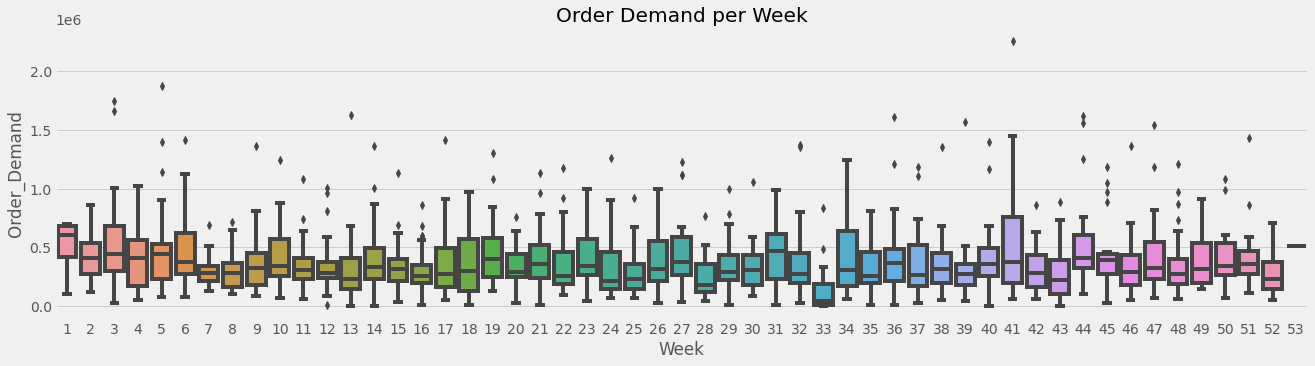

In [ ]:
fig, ax = plt.subplots(figsize=(20, 5))
sns.boxplot(data=df, x='Week', y='Order_Demand')
ax.set_title('Order Demand per Week')
plt.show()

In [ ]:
# Resample data as Weekly 
df_week = df.resample('W').mean()

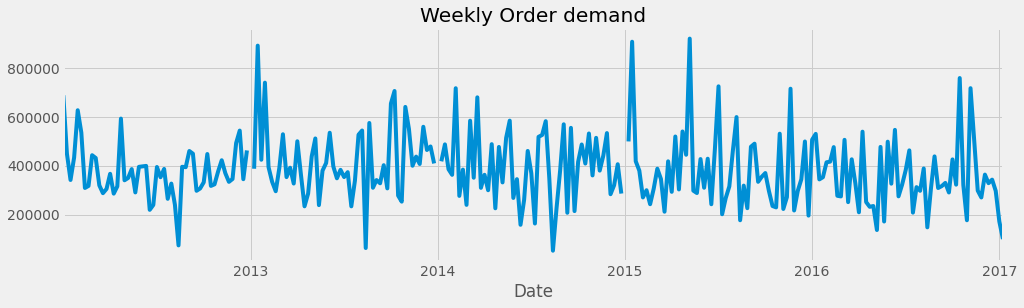

In [ ]:
df_week['Order_Demand'].plot(figsize = (15,4), title = 'Weekly Order demand')
plt.show()

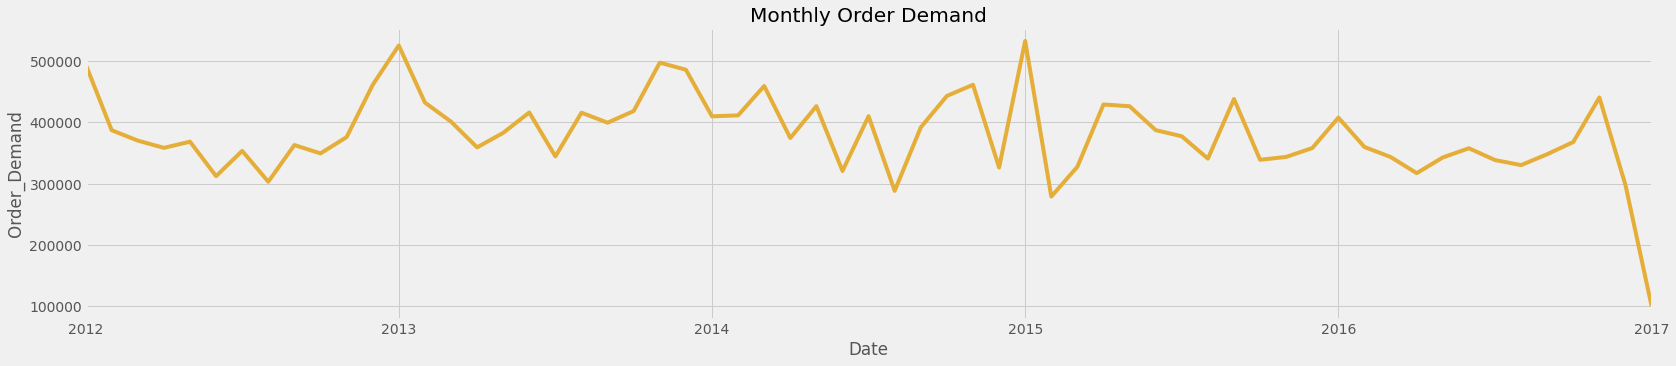

In [ ]:
color_pal = sns.color_palette()
df_month = df.resample('MS').mean()
df_month.Order_Demand.plot(figsize = (25,5), title = 'Monthly Order Demand', color = color_pal[2])
plt.ylabel('Order_Demand')
plt.show()

In [ ]:
#for fashion purposes ezez
plt.style.use('fivethirtyeight')

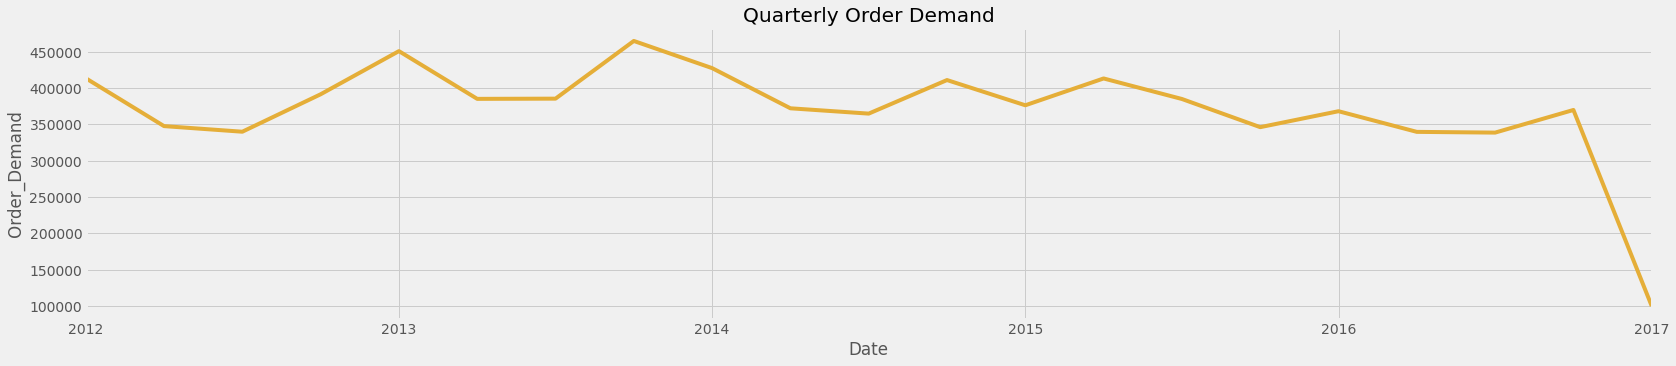

In [ ]:
color_pal = sns.color_palette()
df_Q= df.resample('Q').mean()
df_Q.Order_Demand.plot(figsize = (25,5), title = 'Quarterly Order Demand', color = color_pal[2])
plt.ylabel('Order_Demand')
plt.show()

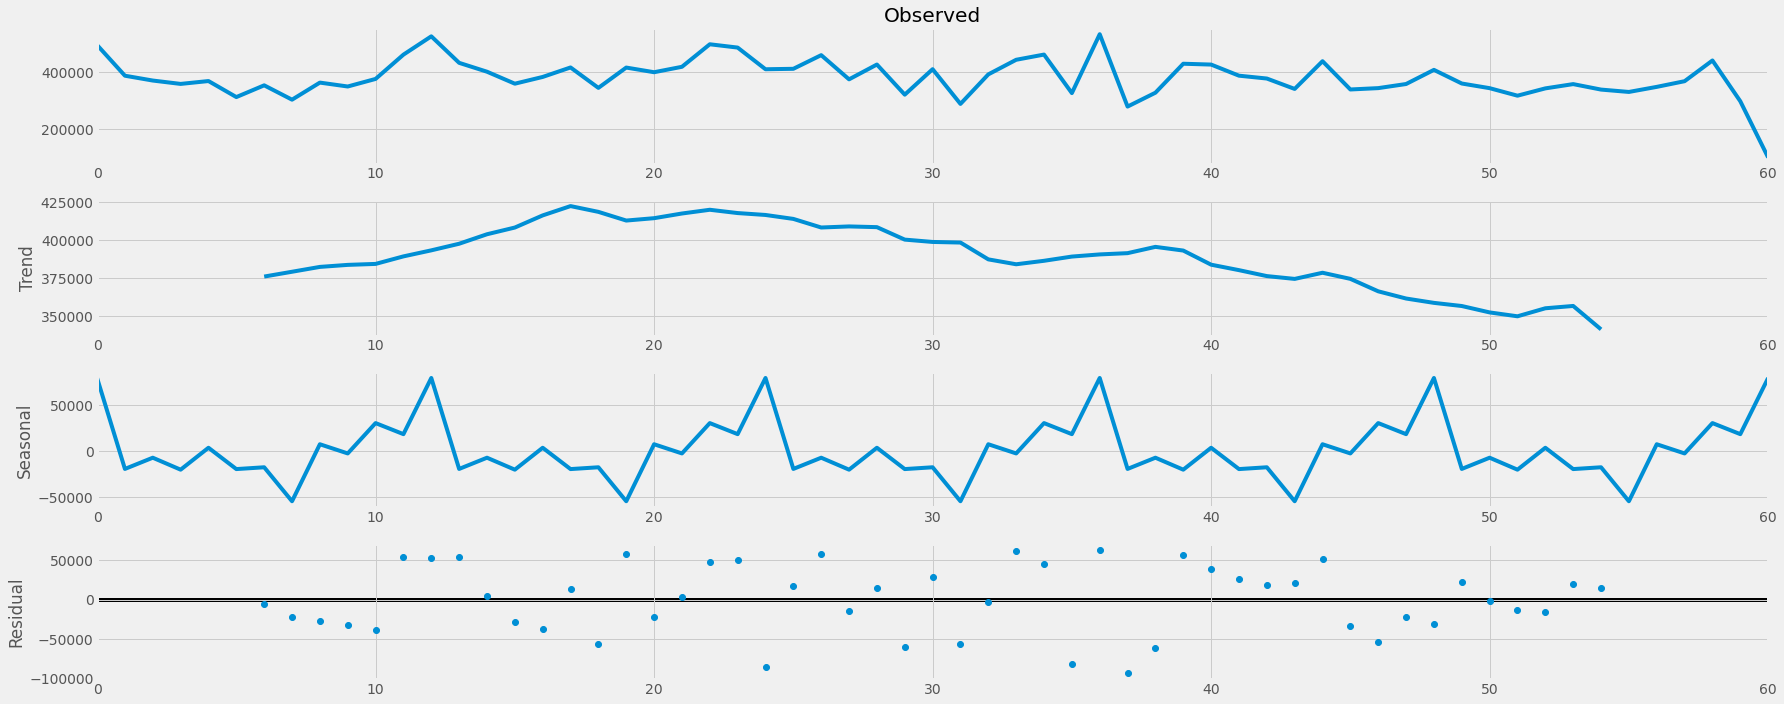

In [ ]:
#Seasonal decomposition using moving averages
from pylab import rcParams
from statsmodels.tsa.seasonal import seasonal_decompose
rcParams['figure.figsize'] = 25, 10
decomposition = seasonal_decompose(df_month.Order_Demand.values, model='additive', period = 12)
                   
fig = decomposition.plot()
plt.show()

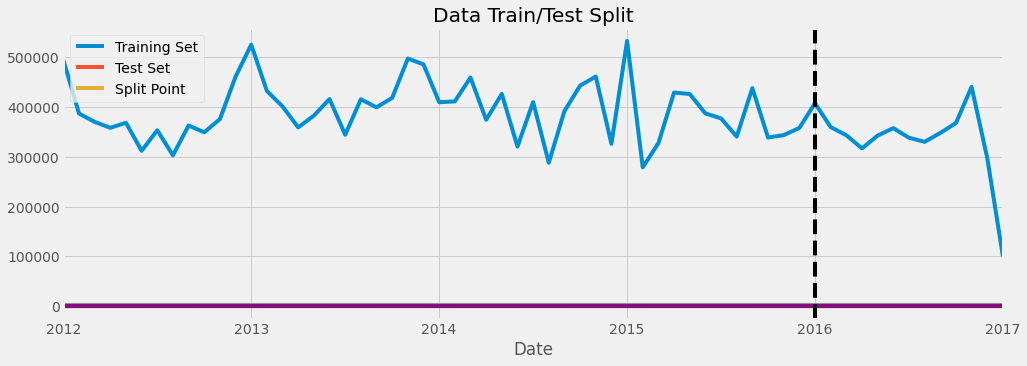

In [ ]:
from datetime import datetime
from datetime import timedelta
train_end = datetime(2016,1,1)
test_end = datetime(2017,1,1)

df_train = df_month[:train_end]
df_test = df_month[train_end:test_end]

# plot train and test dataset on the same graph
fig, ax = plt.subplots(figsize=(15, 5))
df_train.plot(ax=ax, label='Training Set', title='Data Train/Test Split')
df_test.plot(ax=ax, label='Test Set')
ax.axvline('01-01-2016', color='black', ls='--')
ax.legend(['Training Set', 'Test Set','Split Point'])
plt.show()

In [ ]:
df_train.head()

,Order_Demand,day_of_the_week,Quarter,Month,Year,Week
Date,,,,,,
2012-01-01,495055.555556,2.111111,1.0,1.0,2012.0,3.055556
2012-02-01,387190.476190,2.000000,1.0,2.0,2012.0,7.000000
2012-03-01,370238.095238,2.190476,1.0,3.0,2012.0,11.238095
2012-04-01,358400.000000,2.560000,2.0,4.0,2012.0,15.440000
2012-05-01,368478.260870,2.217391,2.0,5.0,2012.0,20.130435


In [ ]:
df_train.drop(['day_of_the_week', 'Quarter','Month','Year','Week'], axis=1, inplace=True)
df_test.drop(['day_of_the_week', 'Quarter','Month','Year','Week'], axis=1, inplace=True)

In [ ]:
df_train = df_train.reset_index()
df_test = df_test.reset_index()


In [ ]:
df_train.columns = ['ds','y']
df_test.columns = ['ds','y']
df_train.head()

,ds,y
0,2012-01-01,495055.555556
1,2012-02-01,387190.476190
2,2012-03-01,370238.095238
3,2012-04-01,358400.000000
4,2012-05-01,368478.260870


In [ ]:
m = Prophet()

In [ ]:
m.fit(df_train)

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpu03odowj/ta52eorw.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpu03odowj/aliuj8tq.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.9/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=55184', 'data', 'file=/tmp/tmpu03odowj/ta52eorw.json', 'init=/tmp/tmpu03odowj/aliuj8tq.json', 'output', 'file=/tmp/tmpu03odowj/prophet_model8jkqn4y6/prophet_model-20230324170922.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
17:09:22 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
17:09:22 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [ ]:
pred = m.predict(df_test)
pred


,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2016-01-01,383825.813973,410558.952335,531654.943370,383825.813973,383825.813973,88977.932765,88977.932765,88977.932765,88977.932765,88977.932765,88977.932765,0.0,0.0,0.0,472803.746737
1,2016-02-01,383483.923108,295364.109903,416679.042242,383483.565472,383484.314643,-29876.719423,-29876.719423,-29876.719423,-29876.719423,-29876.719423,-29876.719423,0.0,0.0,0.0,353607.203685
2,2016-03-01,383164.089719,318346.103199,435251.317743,383162.949238,383165.295773,-6242.587667,-6242.587667,-6242.587667,-6242.587667,-6242.587667,-6242.587667,0.0,0.0,0.0,376921.502052
3,2016-04-01,382822.198854,288641.524018,404750.537706,382819.992337,382824.657537,-36784.040088,-36784.040088,-36784.040088,-36784.040088,-36784.040088,-36784.040088,0.0,0.0,0.0,346038.158766
4,2016-05-01,382491.336727,326869.607052,442558.691960,382487.654054,382495.378536,1780.726489,1780.726489,1780.726489,1780.726489,1780.726489,1780.726489,0.0,0.0,0.0,384272.063216
5,2016-06-01,382149.445863,308243.729603,422736.194850,382144.039691,382154.862814,-18171.441849,-18171.441849,-18171.441849,-18171.441849,-18171.441849,-18171.441849,0.0,0.0,0.0,363978.004014
6,2016-07-01,381818.583736,317860.652749,430432.554928,381811.318168,381826.080339,-8571.360071,-8571.360071,-8571.360071,-8571.360071,-8571.360071,-8571.360071,0.0,0.0,0.0,373247.223665
7,2016-08-01,381476.692871,293044.735513,406995.672181,381467.317157,381485.877404,-31295.387386,-31295.387386,-31295.387386,-31295.387386,-31295.387386,-31295.387386,0.0,0.0,0.0,350181.305485
8,2016-09-01,381134.802007,302269.021001,420214.954626,381123.089544,381146.259032,-20790.630164,-20790.630164,-20790.630164,-20790.630164,-20790.630164,-20790.630164,0.0,0.0,0.0,360344.171843
9,2016-10-01,380803.939880,305812.961532,423772.793127,380789.695169,380817.992704,-16642.232807,-16642.232807,-16642.232807,-16642.232807,-16642.232807,-16642.232807,0.0,0.0,0.0,364161.707073


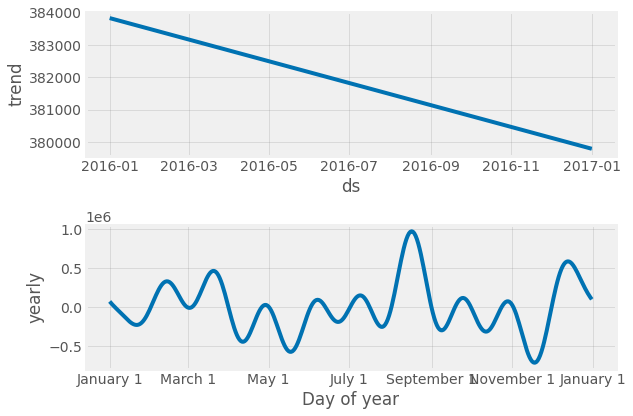

In [ ]:
fig = m.plot_components(pred)
plt.show()

In [ ]:
df_pred = pred[['ds', 'yhat']]
df_test

,ds,y
0,2016-01-01,407722.222222
1,2016-02-01,359800.000000
2,2016-03-01,343454.545455
3,2016-04-01,317050.000000
4,2016-05-01,342700.000000
5,2016-06-01,357727.272727
6,2016-07-01,338476.190476
7,2016-08-01,330190.476190
8,2016-09-01,348000.000000
9,2016-10-01,367952.380952


In [ ]:
df_pred = df_pred.set_index('ds')
df_test = df_test.set_index('ds')

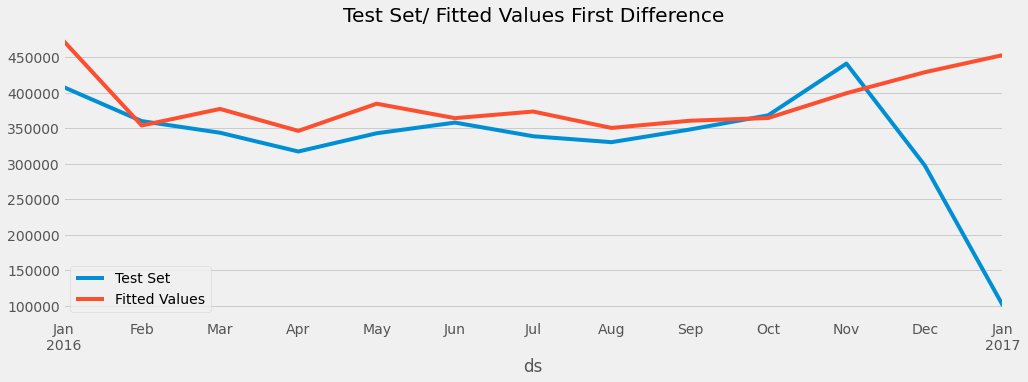

In [ ]:
fig, ax = plt.subplots(figsize=(15, 5))
df_test.plot(ax=ax, label='Training Set', title='Test Set/ Fitted Values First Difference')
df_pred.plot(ax=ax, label='Prediction')
ax.legend(['Test Set', 'Fitted Values'])
plt.show()

In [ ]:
np.sqrt(mean_squared_error(y_true=df_test['y'],
                   y_pred=df_pred['yhat']))

108519.27704618071

In [ ]:
mean_absolute_error(y_true=df_test['y'],
                   y_pred=df_pred['yhat'])

59833.39090192741

In [ ]:
mean_absolute_percentage_error(y_true=df_test['y'],
                   y_pred=df_pred['yhat'])

0.3673613132601318